# Topic Modelling Using LDA

We have Reviews of Groww app,which is an online investment platform based in India. It allows users to invest in a variety of financial products such as mutual funds, stocks, exchange-traded funds (ETFs), and more. Groww provides a user-friendly interface and mobile app, making it convenient for people to start investing and managing their portfolios.

### Source: 
The data is of the year 2022 scraped from Google Play Store.

### Objective
Identify Dominant Topics: Using topic modeling, we aim to identify Major themes, sentiments, and user preferences.


In [1]:
import pandas as pd
import numpy as np

In [2]:
d=pd.read_csv("Groww(2022)")

In [3]:
import nltk
nltk.download('words')

C:\Users\SADIYA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SADIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
d1=d.copy()

# Preprocessing

## 1.Converting to LOWER case

In [5]:

d1['clean_reviews'] = d1['Reviews'].apply(lambda x: str(x).lower())
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24494,💯,5,2022,💯
1,24495,I love this app,5,2022,i love this app
2,24496,Please add some more options / features like T...,4,2022,please add some more options / features like t...
3,24497,"Complicated, misleading and confusing, waste o...",1,2022,"complicated, misleading and confusing, waste o..."
4,24498,Everything under one single click!!!... Kudos ...,5,2022,everything under one single click!!!... kudos ...


## 2. Removing Non-Alpha Data(digits,puntuation.diacritics)
diacritics are symbols or marks that are added to letters in some languages to indicate a change in pronunciation, stress, or meaning. 

In [6]:
#3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS
d1['clean_reviews'] = d1['clean_reviews'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24494,💯,5,2022,
1,24495,I love this app,5,2022,i love this app
2,24496,Please add some more options / features like T...,4,2022,please add some more options features like t...
3,24497,"Complicated, misleading and confusing, waste o...",1,2022,complicated misleading and confusing waste o...
4,24498,Everything under one single click!!!... Kudos ...,5,2022,everything under one single click kudos ...


## 3. Removing White Space

In [7]:
d1['clean_reviews'] = d1['clean_reviews'].str.replace(r'\s{2,}', ' ',regex=True)
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24494,💯,5,2022,
1,24495,I love this app,5,2022,i love this app
2,24496,Please add some more options / features like T...,4,2022,please add some more options features like tar...
3,24497,"Complicated, misleading and confusing, waste o...",1,2022,complicated misleading and confusing waste of ...
4,24498,Everything under one single click!!!... Kudos ...,5,2022,everything under one single click kudos to gro...


## 4. Word Tokenization

In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SADIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
d1['clean_reviews'] = d1['clean_reviews'].apply(lambda x: word_tokenize(x))
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24494,💯,5,2022,[]
1,24495,I love this app,5,2022,"[i, love, this, app]"
2,24496,Please add some more options / features like T...,4,2022,"[please, add, some, more, options, features, l..."
3,24497,"Complicated, misleading and confusing, waste o...",1,2022,"[complicated, misleading, and, confusing, wast..."
4,24498,Everything under one single click!!!... Kudos ...,5,2022,"[everything, under, one, single, click, kudos,..."


## 5. Removing Stop Words
Stop Words are frequently occuring words that do not carry significant meaning on their own.Examples of stop words in English include "the," "and," "in," "of," "a," "an," "is," "for," and "to,"

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SADIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
d1['clean_reviews'] = d1['clean_reviews'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24494,💯,5,2022,[]
1,24495,I love this app,5,2022,[love]
2,24496,Please add some more options / features like T...,4,2022,"[please, options, features, like, target, order]"
3,24497,"Complicated, misleading and confusing, waste o...",1,2022,"[complicated, misleading, confusing, waste, ti..."
4,24498,Everything under one single click!!!... Kudos ...,5,2022,"[everything, single, click, kudos, groww, team]"


In [12]:
d1 = d1[d1['clean_reviews'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words


## 6. LEMMATIZATION

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SADIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
d1['clean_reviews'] = d1['clean_reviews'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24496,Please add some more options / features like T...,4,2022,"[please, option, feature, like, target, order]"
1,24497,"Complicated, misleading and confusing, waste o...",1,2022,"[complicated, misleading, confusing, waste, ti..."
2,24498,Everything under one single click!!!... Kudos ...,5,2022,"[everything, single, click, kudos, groww, team]"
3,24500,I want buy yes Bank shere but this can not buy,1,2022,"[want, bank, shere]"
4,24501,Jabse grow app jindagi mai aaya hai ..jindagi ...,5,2022,"[jabse, grow, jindagi, aaya, jindagi, grow, ga..."


## 7. Extracting only NOUN

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SADIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
def filter_nouns(words):
    tagged_words = nltk.pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos in ["NN", "NNS"]]
    return nouns
d1['clean_reviews'] = d1['clean_reviews'].apply(filter_nouns)



By including both "NN" and "NNS" in the list of accepted part-of-speech tags, We ensure that the code captures both singular and plural nouns, providing a more comprehensive analysis of the text data.

In [17]:
d1.head()

,Unnamed: 0,Reviews,score,Year,clean_reviews
0,24496,Please add some more options / features like T...,4,2022,"[please, option, feature, target, order]"
1,24497,"Complicated, misleading and confusing, waste o...",1,2022,"[waste, time, effort]"
2,24498,Everything under one single click!!!... Kudos ...,5,2022,"[everything, click, kudos, groww, team]"
3,24500,I want buy yes Bank shere but this can not buy,1,2022,[bank]
4,24501,Jabse grow app jindagi mai aaya hai ..jindagi ...,5,2022,"[jabse, grow, jindagi, aaya, jindagi, grow, ga..."


In [18]:
d1 = d1[d1['clean_reviews'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

Our data consists of English as well as non-english words, we try to filter out the non-english nouns or non- standard nouns.

## Filtering out non-English nouns (both singular and plural)

In [19]:

from nltk.corpus import words, wordnet
english_words = set(words.words())
def filter_english_nouns(noun_tokens):
    english_nouns = []
    for noun in noun_tokens:
        # Check if the noun is in WordNet
        if wordnet.synsets(noun):
            english_nouns.append(noun)
        # Check if the noun's singular form is in WordNet
        elif wordnet.synsets(noun[:-1]):
            english_nouns.append(noun)
        else:
        # Split compound nouns and check each part
            parts = noun.split("-")  
            if all(part.lower() in english_words for part in parts):
                english_nouns.append(noun)
    return english_nouns

# Apply the filter_english_nouns function to the 'nouns' column
d1['english_nouns'] = d1['clean_reviews'].apply(filter_english_nouns)


## Document Term Matrix

In [20]:
import gensim

In [21]:
from gensim import corpora

In [22]:
dictionary = corpora.Dictionary(d1['english_nouns'])
print(dictionary)

Dictionary<4095 unique tokens: ['feature', 'option', 'order', 'please', 'target']...>


In [23]:
doc_term_matrix = d1['english_nouns'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and their count in corpus

0             [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
1                             [(5, 1), (6, 1), (7, 1)]
2          [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
3        [(13, 1), (14, 2), (15, 1), (16, 2), (17, 1)]
4                  [(1, 1), (10, 2), (18, 2), (19, 1)]
5    [(1, 1), (20, 1), (21, 1), (22, 1), (23, 1), (...
6                          [(10, 1), (29, 1), (30, 1)]
7    [(8, 1), (10, 3), (12, 1), (14, 1), (31, 1), (...
8                                    [(1, 1), (42, 1)]
9    [(6, 1), (31, 1), (43, 1), (44, 3), (45, 1), (...
Name: english_nouns, dtype: object

## LDA

In [24]:
from IPython.display import clear_output

In [25]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=10,random_state=45)
clear_output()

* corpus: This should be your document-term matrix.

* num_topics: Specifies the number of topics you want the model to discover.

* id2word: This is a mapping that connects the term IDs in your document-term matrix to the actual terms (words) in your vocabulary. 

* passes: Controls the number of passes the algorithm makes over the entire corpus during training.

* random_state: Specifies a random seed for reproducibility. Setting a fixed random seed ensures that the results are consistent across different runs

In [26]:
ldamodel.print_topics()  

[(0,
  '0.147*"stock" + 0.085*"application" + 0.059*"fund" + 0.059*"market" + 0.058*"investment" + 0.048*"share" + 0.035*"trading" + 0.029*"platform" + 0.026*"sell" + 0.017*"crash"'),
 (1,
  '0.068*"session" + 0.051*"customer" + 0.049*"time" + 0.048*"order" + 0.046*"service" + 0.043*"loss" + 0.036*"issue" + 0.029*"support" + 0.027*"glitch" + 0.019*"money"'),
 (2,
  '0.135*"time" + 0.082*"login" + 0.079*"issue" + 0.051*"problem" + 0.036*"please" + 0.026*"today" + 0.024*"market" + 0.024*"morning" + 0.024*"show" + 0.017*"option"'),
 (3,
  '0.112*"money" + 0.094*"account" + 0.084*"groww" + 0.031*"grow" + 0.029*"amount" + 0.026*"bank" + 0.025*"day" + 0.022*"experience" + 0.020*"team" + 0.018*"help"'),
 (4,
  '0.062*"option" + 0.053*"charge" + 0.038*"price" + 0.033*"feature" + 0.032*"groww" + 0.029*"loss" + 0.028*"trading" + 0.028*"profit" + 0.022*"trade" + 0.021*"interface"')]

Five Topics and their Keywords generated by LDA

## Visualization

In [27]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

C:\Users\SADIYA\anaconda3\lib\site-packages\scipy\sparse\sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
C:\Users\SADIYA\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.113348 -0.217075       1        1  21.995858
1      0.207599 -0.118079       2        1  21.843015
3      0.134483  0.280933       3        1  20.635138
4     -0.111894  0.129358       4        1  17.817175
0     -0.343535 -0.075136       5        1  17.708814, topic_info=          Term         Freq        Total Category  logprob  loglift
52       stock  3367.000000  3367.000000  Default  30.0000  30.0000
6         time  5230.000000  5230.000000  Default  29.0000  29.0000
127      money  3514.000000  3514.000000  Default  28.0000  28.0000
31     account  2507.000000  2507.000000  Default  27.0000  27.0000
226      login  2335.000000  2335.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
173  interface   160.626112   647.897272   Topic5  -4.9569   0.3365
59   dashboard   148.444114   617.948851   Topic5  -5.0358   0.3049
116       user   128.993568   487.654909   Topic5  -5.1762   0.4013
134      start   107.273138   223.220361   Topic5  -5.3606   0.9983
95       thing   121.405790   507.110448   Topic5  -5.2369   0.3015

[270 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
763       3  0.991384   access
31        3  0.999842  account
190       4  0.993395    alert
142       3  0.937895   amount
142       5  0.060470   amount
...     ...       ...      ...
86        1  0.180311     year
86        2  0.033288     year
86        3  0.427198     year
86        4  0.094316     year
86        5  0.263531     year

[297 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

We see Topic 1 and 2 are a bit overlapping.lets look at the coherance score

In [98]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=d1['english_nouns'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Coherence Score:  0.4065176057207595


## Coherence Score for a range of Topic Numbers
We try to explore different numbers of topics and evaluate the coherence of topics using the C_V coherence measure. It helps us find the optimal number of topics that result in the most coherent and interpretable topic models for our text data

In [99]:
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
    cv_score =[]
    topic_num = []
    for i in range(2,topic_range):
        topic_num.append(i)
        Lda = gensim.models.ldamodel.LdaModel
        ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
        cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
        clear_output()
    return topic_num,cv_score
topic_num,cv_score = calculate_topic_cv(ldamodel,d1['english_nouns'],dictionary,15)
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)


,Coherence_Score
Topic,
8,0.418621
6,0.414457
9,0.412554
4,0.410645
5,0.406518
3,0.401304
10,0.399059
2,0.395015
13,0.394699


The Top four Number of topics have almost same Coherence score with only minor differences

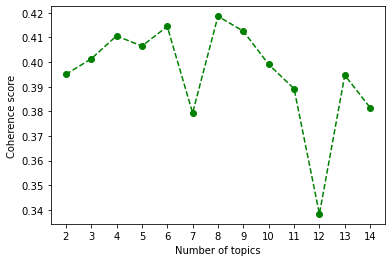

In [100]:
import matplotlib.pyplot as plt
plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()


## Hyperparameter Tuning
We explore different combinations of hyperparameters to find the best LDA model with the highest coherence score.
* alpha_range: This list specifies the range of values for the alpha hyperparameter in the LDA model. Alpha is a hyperparameter that controls the distribution of topics within documents. 
* beta_range: This list specifies the range of values for the beta hyperparameter in the LDA model. Beta controls the distribution of words within topics
We are using Top 5 number of topics with highest choherance score.

In [33]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import numpy as np
import itertools

# Define a range of hyperparameters to tune
num_topics_range = [6, 8, 9, 4, 5]
alpha_range = ['auto', 'symmetric', 'asymmetric']
beta_range = ['auto', 0.01, 0.1, 0.5, 1.0]

best_coherence_score = -1
best_lda_model = None
best_params = {}

# Iterate through all possible hyperparameter combinations
for num_topics, alpha, beta in itertools.product(num_topics_range, alpha_range, beta_range):
    print(f"Training LDA model with {num_topics} topics, alpha={alpha}, beta={beta}")
    
    lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, alpha=alpha, eta=beta)

    # Compute coherence score to evaluate the model
    coherence_model = CoherenceModel(model=lda_model, texts=d1["english_nouns"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    print(f"Coherence Score: {coherence_score}")

    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_lda_model = lda_model
        best_params = {'num_topics': num_topics, 'alpha': alpha, 'beta': beta}

print("Best LDA Model:")
print(f"Number of Topics: {best_params['num_topics']}")
print(f"Alpha: {best_params['alpha']}")
print(f"Beta: {best_params['beta']}")


Training LDA model with 6 topics, alpha=auto, beta=auto
Coherence Score: 0.3448712993890737
Training LDA model with 6 topics, alpha=auto, beta=0.01
Coherence Score: 0.3773101174128348
Training LDA model with 6 topics, alpha=auto, beta=0.1
Coherence Score: 0.380357284705194
Training LDA model with 6 topics, alpha=auto, beta=0.5
Coherence Score: 0.3879213497543718
Training LDA model with 6 topics, alpha=auto, beta=1.0
Coherence Score: 0.3834587105006631
Training LDA model with 6 topics, alpha=symmetric, beta=auto
Coherence Score: 0.40267802813520476
Training LDA model with 6 topics, alpha=symmetric, beta=0.01
Coherence Score: 0.38178789268945096
Training LDA model with 6 topics, alpha=symmetric, beta=0.1
Coherence Score: 0.39358230971600333
Training LDA model with 6 topics, alpha=symmetric, beta=0.5
Coherence Score: 0.4095606771628062
Training LDA model with 6 topics, alpha=symmetric, beta=1.0
Coherence Score: 0.3952196483641577
Training LDA model with 6 topics, alpha=asymmetric, beta=au

Best LDA Model:

Number of Topics: 8

Alpha: asymmetric

Beta: 1.0

In [28]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=8, id2word=dictionary, passes=10,alpha='asymmetric',eta=1.0, random_state=45)
clear_output()

In [29]:
ldamodel.print_topics()  

[(0,
  '0.076*"stock" + 0.050*"market" + 0.044*"application" + 0.042*"groww" + 0.035*"trading" + 0.034*"option" + 0.030*"investment" + 0.028*"fund" + 0.026*"price" + 0.023*"time"'),
 (1,
  '0.096*"time" + 0.070*"issue" + 0.045*"problem" + 0.045*"login" + 0.038*"session" + 0.032*"loss" + 0.028*"customer" + 0.026*"order" + 0.022*"today" + 0.020*"please"'),
 (2,
  '0.036*"something" + 0.033*"detail" + 0.027*"page" + 0.020*"opening" + 0.018*"chart" + 0.017*"phone" + 0.016*"log" + 0.015*"option" + 0.015*"connection" + 0.014*"screen"'),
 (3,
  '0.142*"account" + 0.047*"money" + 0.039*"bank" + 0.035*"day" + 0.029*"amount" + 0.023*"process" + 0.019*"withdrawal" + 0.019*"groww" + 0.013*"help" + 0.012*"month"'),
 (4,
  '0.105*"money" + 0.067*"charge" + 0.047*"share" + 0.024*"profit" + 0.023*"download" + 0.020*"transaction" + 0.018*"brokerage" + 0.018*"amount" + 0.018*"balance" + 0.016*"fraud"'),
 (5,
  '0.065*"login" + 0.065*"service" + 0.011*"think" + 0.011*"password" + 0.011*"season" + 0.005*"

In [30]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

C:\Users\SADIYA\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.227281 -0.218598       1        1  32.182139
1     -0.264489  0.111070       2        1  30.108186
3     -0.026441  0.129433       3        1  11.394045
4     -0.012080  0.101215       4        1   9.941293
2      0.111927 -0.091020       5        1   6.860901
6      0.160516 -0.020501       6        1   4.172813
7      0.147895 -0.023917       7        1   2.789819
5      0.109953  0.012318       8        1   2.550804, topic_info=             Term         Freq        Total Category  logprob  loglift
31        account  2098.000000  2098.000000  Default  30.0000  30.0000
226         login  1969.000000  1969.000000  Default  29.0000  29.0000
52          stock  3173.000000  3173.000000  Default  28.0000  28.0000
127         money  2742.000000  2742.000000  Default  27.0000  27.0000
147         issue  2742.000000  2742.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
111          fast    17.522313    70.497390   Topic8  -5.2349   2.2767
226         login   214.450671  1969.822341   Topic8  -2.7303   1.4511
274   transparent     4.528705    14.341785   Topic8  -6.5879   2.5160
1180         heck     4.571145    14.669689   Topic8  -6.5786   2.5027
564      question     5.725792    26.510488   Topic8  -6.3534   2.1362

[364 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
763       1  0.009553  access
763       2  0.009553  access
763       3  0.009553  access
763       4  0.009553  access
763       5  0.936238  access
...     ...       ...     ...
86        4  0.002979    year
86        5  0.002979    year
86        6  0.002979    year
86        7  0.002979    year
86        8  0.002979    year

[2408 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3, 7, 8, 6])

There is a lot of overlapping between clusters,Lets try to reduce the topic numbers.

Training LDA model with 5 topics

alpha=asymmetric

beta=0.5

Coherence Score: 0.4466399906669224

In [31]:

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=10,alpha='asymmetric',eta=0.5, random_state=45)
clear_output()

In [104]:
ldamodel.print_topics()  

[(0,
  '0.077*"stock" + 0.052*"groww" + 0.050*"market" + 0.050*"trading" + 0.045*"application" + 0.038*"option" + 0.030*"investment" + 0.026*"fund" + 0.020*"experience" + 0.018*"please"'),
 (1,
  '0.114*"time" + 0.085*"issue" + 0.046*"problem" + 0.045*"session" + 0.034*"customer" + 0.032*"order" + 0.031*"service" + 0.027*"loss" + 0.027*"today" + 0.020*"support"'),
 (2,
  '0.172*"login" + 0.040*"time" + 0.026*"change" + 0.025*"update" + 0.024*"problem" + 0.023*"something" + 0.023*"number" + 0.021*"detail" + 0.017*"page" + 0.015*"show"'),
 (3,
  '0.128*"money" + 0.120*"account" + 0.039*"amount" + 0.033*"bank" + 0.031*"day" + 0.027*"groww" + 0.022*"balance" + 0.020*"process" + 0.016*"withdrawal" + 0.015*"grow"'),
 (4,
  '0.077*"price" + 0.072*"charge" + 0.072*"share" + 0.044*"loss" + 0.043*"profit" + 0.026*"download" + 0.026*"sell" + 0.020*"brokerage" + 0.014*"hota" + 0.013*"bahut"')]

In [32]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

C:\Users\SADIYA\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.162038  0.119904       1        1  34.284492
1     -0.054643 -0.157472       2        1  27.762014
3     -0.185350  0.075284       3        1  15.397434
2      0.128891 -0.243186       4        1  11.310547
4      0.273140  0.205471       5        1  11.245513, topic_info=        Term         Freq        Total Category  logprob  loglift
226    login  2504.000000  2504.000000  Default  30.0000  30.0000
127    money  3241.000000  3241.000000  Default  29.0000  29.0000
31   account  2390.000000  2390.000000  Default  28.0000  28.0000
147    issue  3047.000000  3047.000000  Default  27.0000  27.0000
6       time  5070.000000  5070.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
110    rupee   118.145057   167.566526   Topic5  -4.8100   1.8357
40     trade   123.135633   900.306950   Topic5  -4.7686   0.1958
61      show   124.812834  1046.076947   Topic5  -4.7551   0.0592
488  install    75.587489   171.083522   Topic5  -5.2566   1.3683
166     rate    73.195515   142.704000   Topic5  -5.2888   1.5176

[259 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
763       1  0.009367   access
763       3  0.009367   access
763       4  0.983512   access
763       5  0.009367   access
31        1  0.000418  account
...     ...       ...      ...
558       1  0.021054     zero
558       2  0.021054     zero
558       3  0.947432     zero
558       4  0.021054     zero
558       5  0.021054     zero

[859 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

There is only one overlapping of clusters.

## Coherence Score for Each Topic

In [90]:
from gensim.models import CoherenceModel
# Create a list to store coherence scores for each topic
topic_coherence_scores = []

# Calculate coherence scores for each topic
for topic_id in range(5):
    # Get the top words for the topic
    top_words = [word for word, _ in lda_model.show_topic(topic_id)]
    
    # Compute coherence score for the topic
    coherence_model = CoherenceModel(topics=[top_words], texts=d1["english_nouns"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Append the coherence score to the list
    topic_coherence_scores.append(coherence_score)

# Print coherence scores for each topic
for topic_id, score in enumerate(topic_coherence_scores):
    print(f"Topic {topic_id + 1} Coherence Score: {score}")


Topic 1 Coherence Score: 0.479594191565063
Topic 2 Coherence Score: 0.40544980081273013
Topic 3 Coherence Score: 0.7074160402326329
Topic 4 Coherence Score: 0.36810179230705
Topic 5 Coherence Score: 0.7261255592465031


Topics 3 and 5 appear to be the most coherent and interpretable based on their high coherence scores, while Topics 1, 2, and 4 have lower coherence scores, indicating that they may contain less interpretable or less cohesive terms

## Labeling Topics
Labeling topics is an important step in topic modeling as it provides a human-readable summary or name for each topic. These labels help you understand and interpret the themes or subjects that each topic represents.Ofcourse, there will always be a little bit of ambiguity due to the inherent complexity and overlap of natural language.This is also why labeling topics can sometime become difficult.
After Reviewing the Top terms and Manually inspecting the data i labeled the Topics as following
  * Topic_Number 0-"Application, Investment Options" (It is a combination of two different themes-users talking about user-interface, their experience with     the grow app and about investment features that Groww lack or already have)
  * Topic_Number 1-"Time delay, Customer Service" (It is also a combination of two different themes users experiencing time delay while order execution and     customer Service support)
  * Topic_Number 2-"Log in issues, Troubleshooting"-
  * Topic_Number 3-"Financial Transactions" 
  * Topic_Number 3-"Charges, Brokerage" 

In [149]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ["Application, Investment Options","Time delay, Customer Service","Log in issues, Troubleshooting","Financial Transactions","Charges, Brokerage"]
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Application, Investment Options","['stock', 'groww', 'market', 'trading', 'application', 'option', 'investment', 'fund', 'experience', 'please']"
1,1,"Time delay, Customer Service","['time', 'issue', 'problem', 'session', 'customer', 'order', 'service', 'loss', 'today', 'support']"
2,2,"Log in issues, Troubleshooting","['login', 'time', 'change', 'update', 'problem', 'something', 'number', 'detail', 'page', 'show']"
3,3,Financial Transactions,"['money', 'account', 'amount', 'bank', 'day', 'groww', 'balance', 'process', 'withdrawal', 'grow']"
4,4,"Charges, Brokerage","['price', 'charge', 'share', 'loss', 'profit', 'download', 'sell', 'brokerage', 'hota', 'bahut']"


In [150]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
    topic_num =[]
    topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
    topic_num.append(topic_details[0][0]) # Appending top topic
    if len(topic_details) > 1:
         if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
            topic_num.append(topic_details[1][0])
    d1.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [151]:
for index,topic_num in enumerate(d1.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  d1.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [171]:
d1.loc[d1.Topic_Number.str.contains(''),['Reviews','Topic_Name']].sample(5)\
.style.set_properties(subset=['Reviews'], **{'width':'300px'})

,Reviews,Topic_Name
14482,Superb App for Share Market,"Application, Investment Options"
11175,"which is the worst thing is that couldnot set the stop loss , limit price (high &low) and sell order together in groww app.","Charges, Brokerage"
16038,"Please come with insta trade feture for future and options trading. Where we can see everything like chart , profits and loss , most tradable buy call and put option","Application, Investment Options"
6092,What nonsense update Very bad Very bad Very bad Very bad No realtime update Example Nifty is in up trend grow chart showing down trend so I am reducing my four star to one,"Application, Investment Options & Log in issues, Troubleshooting"
9373,"Customer support services worst. No solution even after sending repeatedly messages in past one month and always got reply ""appreciate your patience and understanding ,wait for 2-3working days"". Please refer ticket id 5655143","Time delay, Customer Service"


## Most Talked Topic in Reviews

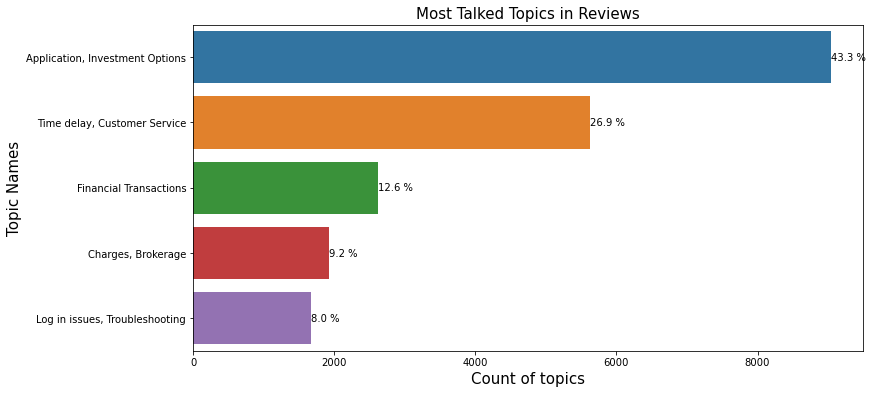

In [172]:
import seaborn as sns
plt.figure(figsize=(12,6))
Y=d1.Topic_Name.value_counts()[:5].index
X=d1.Topic_Name.value_counts()[:5].values
ax=sns.barplot(x=X, y=Y)
plt.ylabel('Topic Names',size=15)
plt.xlabel('Count of topics',size=15)
plt.title('Most Talked Topics in Reviews',size=15)
for c in ax.containers:
    total=X.sum()
    ax.bar_label(c, label_type='edge', labels=[f'{val / total * 100.0:.1f} %' for val in X])

## Most Talked Combined Topics in Reviews

Text(0.5, 1.0, 'Most Talked Combined Topics in Reviews')

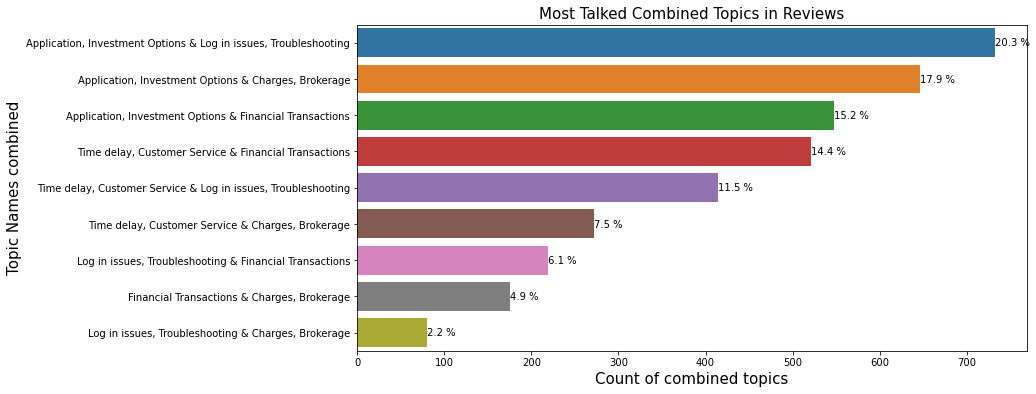

In [173]:
plt.figure(figsize=(12,6))
Y=d1.Topic_Name.value_counts()[6:].index
X=d1.Topic_Name.value_counts()[6:].values
total=d1['Topic_Name'].count()
ax=sns.barplot(x=X, y=Y)
for c in ax.containers:
    total=X.sum()
    ax.bar_label(c, label_type='edge', labels=[f'{val / total * 100.0:.1f} %' for val in X])
plt.ylabel('Topic Names combined',size=15)
plt.xlabel('Count of combined topics',size=15)
plt.title('Most Talked Combined Topics in Reviews',size=15)
